In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install category_encoders
!pip install graphviz

In [4]:
import warnings
warnings.filterwarnings("ignore")


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree



In [6]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'

df = pd.read_csv(data)
df.head()


,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [7]:
df.tail()


,vhigh,vhigh.1,2,2.1,small,low,unacc
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [8]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [9]:
df.tail()

,buying,maint,doors,persons,lug_boot,safety,class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
df.shape


(1727, 7)

In [12]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
['med' 'high' 'low']
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [13]:
df["class"].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: ylabel='count'>

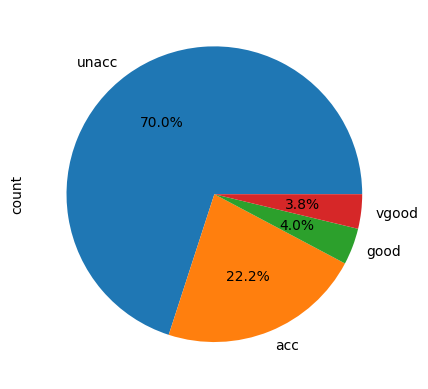

In [14]:
df['class'].value_counts().plot(kind = "pie",autopct='%1.1f%%')

In [15]:
#encoding Data
X=df.drop(['class'], axis=1)
y=df['class']

In [16]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)

In [17]:
le = LabelEncoder()
y_en = le.fit_transform(y)

In [18]:
#splite the data
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size = 0.33, random_state=42)

In [19]:
#modle training
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

#fit the modle
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
from sklearn.metrics import accuracy_score

y_pred_gini = clf_gini.predict(X_test)
print("modle accuracy score with critirion gini index: {0:0.4f}".format(accuracy_score(y_test , y_pred_gini)))

modle accuracy score with critirion gini index: 0.8053


In [21]:
cm = confusion_matrix(y_test, y_pred_gini)
print("confusion matrix\n\n",cm)

confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [22]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [23]:
#creating a dataframe for array formated confusion matrix
cm_df = pd.DataFrame(cm,index=classes_name,columns=classes_name)
cm_df

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


<Axes: >

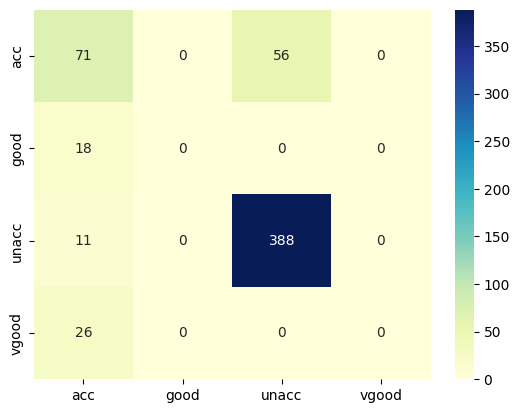

In [24]:
#visualize
sns.heatmap(cm_df,annot=True, fmt="d",cmap="YlGnBu")

In [25]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



In [26]:
#class Balancing
import imblearn
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(['class'], axis=1)
y= df['class']

ran=RandomUnderSampler() 
X_rs,y_rs = ran.fit_resample(X,y)

In [27]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X_rs)

In [28]:
le = LabelEncoder()
y_en = le.fit_transform(y_rs)

In [29]:
#splite the data
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en, test_size = 0.33, random_state=42)

In [30]:
#modle training
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

#fit the modle
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
from sklearn.metrics import accuracy_score

y_pred_gini = clf_gini.predict(X_test)
print("modle accuracy score with critirion gini index: {0:0.4f}".format(accuracy_score(y_test , y_pred_gini)))

modle accuracy score with critirion gini index: 0.6512


In [32]:
cm = confusion_matrix(y_test, y_pred_gini)
print("confusion matrix\n\n",cm)

confusion matrix

 [[ 2  8  0  7]
 [ 0 15  0 12]
 [ 0  3 18  0]
 [ 0  0  0 21]]


In [33]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [34]:
#creating a dataframe for array formated confusion matrix
cm_df = pd.DataFrame(cm,index=classes_name,columns=classes_name)
cm_df

,acc,good,unacc,vgood
acc,2,8,0,7
good,0,15,0,12
unacc,0,3,18,0
vgood,0,0,0,21


<Axes: >

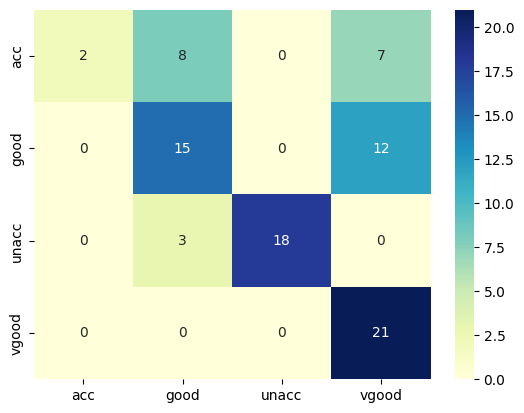

In [35]:
#visualize
sns.heatmap(cm_df,annot=True, fmt="d",cmap="YlGnBu")


In [36]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.12      0.21        17
           1       0.58      0.56      0.57        27
           2       1.00      0.86      0.92        21
           3       0.53      1.00      0.69        21

    accuracy                           0.65        86
   macro avg       0.78      0.63      0.60        86
weighted avg       0.75      0.65      0.61        86



In [37]:
from imblearn.combine import SMOTEENN
X = df.drop(["class"],axis=1)
y=df['class']
encoder =  ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
X_en = encoder.fit_transform(X)

le = LabelEncoder()
y_en = le.fit_transform(y)

ran=SMOTEENN()

X_rs,y_rs= ran.fit_resample(X_en,y_en)



In [38]:
#splite the data
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size = 0.33, random_state=42)

In [39]:
#modle training
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

#fit the modle
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [40]:
from sklearn.metrics import accuracy_score

y_pred_gini = clf_gini.predict(X_test)
print("modle accuracy score with critirion gini index: {0:0.4f}".format(accuracy_score(y_test , y_pred_gini)))

modle accuracy score with critirion gini index: 0.6908


In [41]:
cm = confusion_matrix(y_test, y_pred_gini)
print("confusion matrix\n\n",cm)

confusion matrix

 [[165 115   0  54]
 [  0 220   0 170]
 [ 65   4 172  19]
 [  0   0   0 397]]


In [42]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [43]:
#creating a dataframe for array formated confusion matrix
cm_df = pd.DataFrame(cm,index=classes_name,columns=classes_name)
cm_df

,acc,good,unacc,vgood
acc,165,115,0,54
good,0,220,0,170
unacc,65,4,172,19
vgood,0,0,0,397


<Axes: >

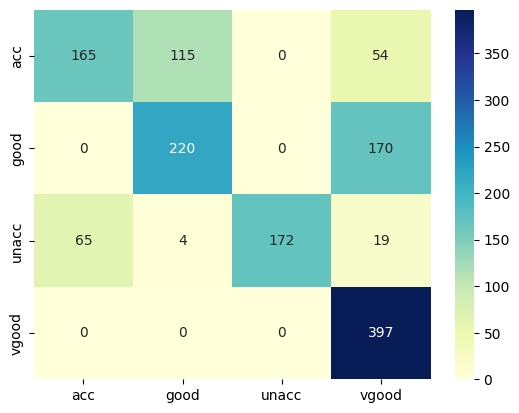

In [44]:
#visualize
sns.heatmap(cm_df,annot=True, fmt="d",cmap="YlGnBu")


In [45]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.72      0.49      0.59       334
           1       0.65      0.56      0.60       390
           2       1.00      0.66      0.80       260
           3       0.62      1.00      0.77       397

    accuracy                           0.69      1381
   macro avg       0.75      0.68      0.69      1381
weighted avg       0.72      0.69      0.68      1381



[Text(0.375, 0.875, 'x[3] <= 1.5\ngini = 0.747\nsamples = 2802\nvalue = [651, 757, 608, 786]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 340\nvalue = [0, 0, 340, 0]'),
 Text(0.5, 0.625, 'x[0] <= 2.5\ngini = 0.722\nsamples = 2462\nvalue = [651, 757, 268, 786]'),
 Text(0.25, 0.375, 'x[5] <= 2.5\ngini = 0.469\nsamples = 530\nvalue = [331, 0, 199, 0]'),
 Text(0.125, 0.125, 'gini = 0.364\nsamples = 435\nvalue = [331, 0, 104, 0]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 95\nvalue = [0, 0, 95, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.652\nsamples = 1932\nvalue = [320, 757, 69, 786]'),
 Text(0.625, 0.125, 'gini = 0.438\nsamples = 617\nvalue = [189, 422, 6, 0]'),
 Text(0.875, 0.125, 'gini = 0.566\nsamples = 1315\nvalue = [131, 335, 63, 786]')]

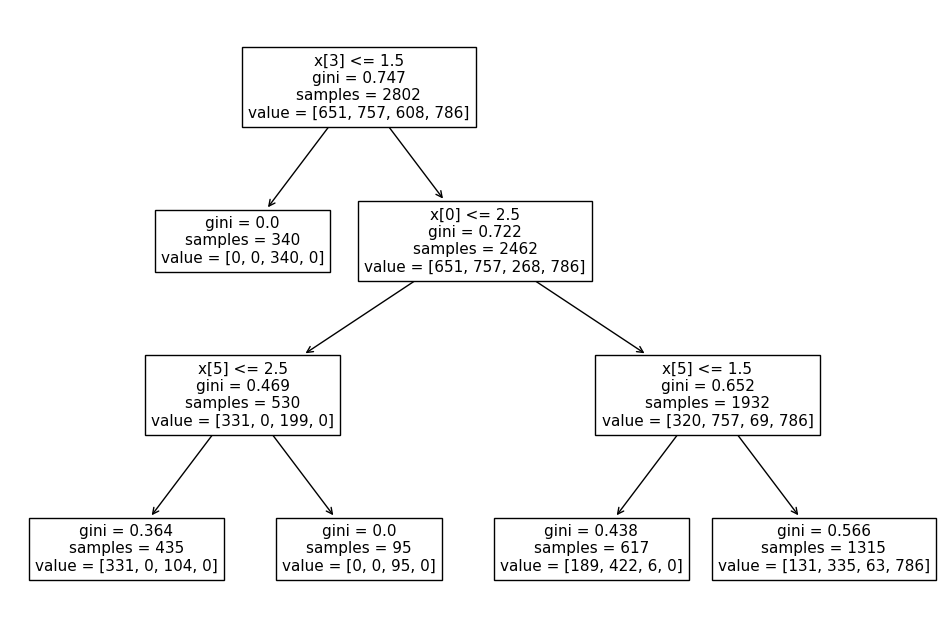

In [46]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

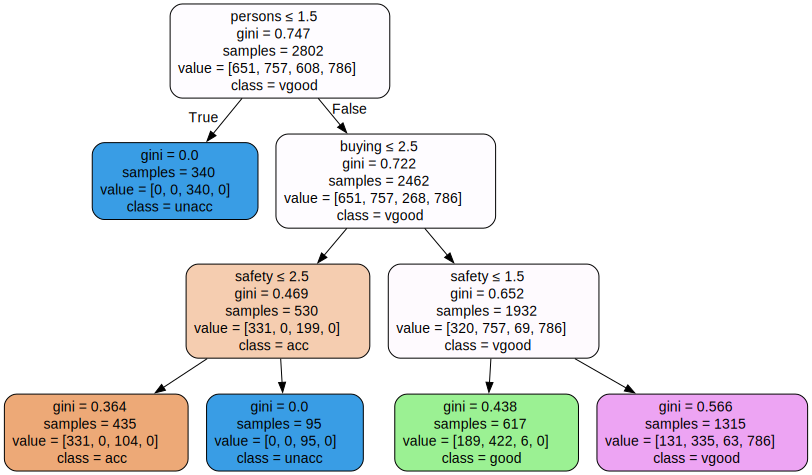

In [47]:
import graphviz

dot_data = tree.export_graphviz(clf_gini, out_file=None,feature_names=X_train.columns,class_names=classes_name,filled=True, rounded=True,special_characters=True)

graph = graphviz.Source(dot_data)
graph


In [80]:
from sklearn.model_selection import GridSearchCV

params={
    'max_depth':[2,3,5,6,8,10,20],
    'min_samples_leaf' : [5,10,20,50,100],
    'criterion':["gini","entropy"]
}

In [81]:
grid_search = GridSearchCV(estimator=clf_gini,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [82]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [90]:
def evaluate_model(dt_classifier):
    print("Train Accuray :",accuracy_score(y_train,dt_classifier.predict(X_train)))
    print("Train confusion matrix:")
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy:",accuracy_score(y_test,dt_classifier.predict(X_test)))
    print('Test confusion matrix')
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))
    cm=confusion_matrix(y_test,dt_classifier.predict(X_test))
    cm_df = pd.DataFrame(cm,index = classes_name,columns = classes_name)
    sns.heatmap(cm_df,annot = True, fmt = 'd',cmap='YlGnBu')
    print(classification_report(y_test,dt_classifier.predict(X_test)))

Train Accuray : 0.9910778015703069
Train confusion matrix:
[[648   1   0   2]
 [  3 754   0   0]
 [ 10   0 598   0]
 [  6   3   0 777]]
--------------------------------------------------
Test Accuracy: 0.9855177407675597
Test confusion matrix
[[331   2   0   1]
 [  1 389   0   0]
 [ 12   0 248   0]
 [  3   1   0 393]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       334
           1       0.99      1.00      0.99       390
           2       1.00      0.95      0.98       260
           3       1.00      0.99      0.99       397

    accuracy                           0.99      1381
   macro avg       0.99      0.98      0.98      1381
weighted avg       0.99      0.99      0.99      1381



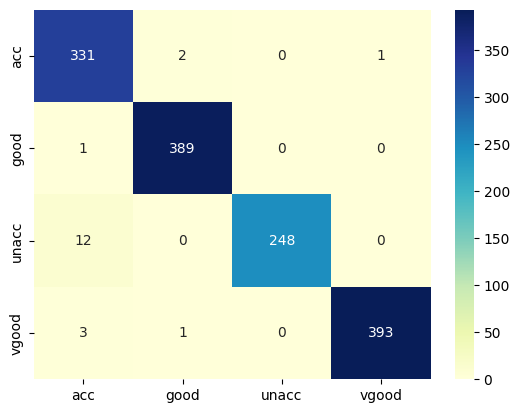

In [91]:
evaluate_model(best_par)

In [98]:
best_par.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

In [104]:
print("Test accuracy:",accuracy_score(y_test,best_par.predict(X_test)))

Test accuracy: 0.9855177407675597


In [106]:
import joblib

filename='finalized_model.joblib'
joblib.dump(best_par,filename)

['finalized_model.joblib']

In [115]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/kaggle/working/finalized_model.joblib